가장 간단한 Regression 모델을 만들어 봅시다

1. 학습 데이터 만들기
   random을 활용해 함수를 만들어 봅시다.

   100개의 데이터이고, 변수가 1개인 데이터셋을 만들어 봅시다.

In [1]:
# 간단한 데이터를 만들어 봅시다.
import torch

x_train = torch.randn(100, 1)  # 100 x 1개 데이터 만들기, 정규분포 기반 랜덤 생성성, (n, 1)
y_train = 3 * x_train + 1 + 0.2 * torch.randn(100, 1)  # 출력 변수: y = 3x + 1 함수에 노이즈 추가된 형태


In [2]:
x_train.shape, y_train.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

In [3]:
?torch.randn

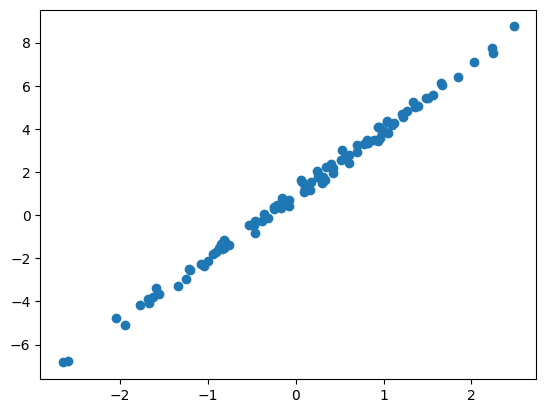

In [4]:
import matplotlib.pyplot as plt

plt.scatter(x_train, y_train)

2. 모델을 만들어 봅시다.

* nn.Linear 한개만 사용하면 Linear Regression이 됩니다

In [5]:
# 모델 생성
model = torch.nn.Linear(1, 1)  # 입력 차원, 출력 차원

3. 손실함수와 최적화 함수를 지정합니다.

   Regression에서는 MSE를 사용하고, 최적화 함수는 Adam을 사용해보겠습니다.  

In [6]:
# 손실 함수 정의
loss_fn = torch.nn.MSELoss()

# 최적화 함수 정의
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

4. 학습을 시작합니다.

In [7]:
epochs = 1000  # 학습 반복회수 설정

# 학습 시작
for epoch in range(epochs):

    # 모델의 추론값 계산
    y_pred = model(x_train)

    # 실제값과 차이로 오차 계산산
    loss = loss_fn(y_pred, y_train)

    # Gradient 계산하여 오차값을 Optimizer에 반영
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 10번째 epoch마다 손실 출력
    if (epoch + 1) % 10 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, 100, loss.item()))

# 파라미터값 출력
print('Learned Parameters:')
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)


Epoch [10/100], Loss: 9.3613
Epoch [20/100], Loss: 8.5457
Epoch [30/100], Loss: 7.7894
Epoch [40/100], Loss: 7.0935
Epoch [50/100], Loss: 6.4566
Epoch [60/100], Loss: 5.8753
Epoch [70/100], Loss: 5.3456
Epoch [80/100], Loss: 4.8632
Epoch [90/100], Loss: 4.4235
Epoch [100/100], Loss: 4.0225
Epoch [110/100], Loss: 3.6563
Epoch [120/100], Loss: 3.3216
Epoch [130/100], Loss: 3.0151
Epoch [140/100], Loss: 2.7342
Epoch [150/100], Loss: 2.4767
Epoch [160/100], Loss: 2.2406
Epoch [170/100], Loss: 2.0240
Epoch [180/100], Loss: 1.8256
Epoch [190/100], Loss: 1.6439
Epoch [200/100], Loss: 1.4779
Epoch [210/100], Loss: 1.3264
Epoch [220/100], Loss: 1.1884
Epoch [230/100], Loss: 1.0630
Epoch [240/100], Loss: 0.9492
Epoch [250/100], Loss: 0.8462
Epoch [260/100], Loss: 0.7533
Epoch [270/100], Loss: 0.6696
Epoch [280/100], Loss: 0.5944
Epoch [290/100], Loss: 0.5271
Epoch [300/100], Loss: 0.4668
Epoch [310/100], Loss: 0.4131
Epoch [320/100], Loss: 0.3654
Epoch [330/100], Loss: 0.3230
Epoch [340/100], Lo

이번에는 Multivariate Regression 모델을 만들어봅시다

y = 3x_1 + 2x_2 + 1 을 만들어봅시다.

입력변수가 2개로 늘어났으므로 모양이 변경됩니다.

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim

# 학습 데이터 생성
x_train = torch.randn(100, 2)  # 크기 (100, 2)인 입력 데이터
y_train = 3 * x_train[:, 0] + 2 * x_train[:, 1] + 1 + 0.2 * torch.randn(100)  # 크기 (100,)인 출력 데이터

# 모델 생성
model = nn.Linear(2, 1)  # 입력 차원 2, 출력 차원 1

# 손실 함수 정의
loss_fn = nn.MSELoss()

# optimizer 정의
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 학습 시작
epochs = 1000

for epoch in range(epochs):

    # 순전파 계산
    y_pred = model(x_train)

    # 손실 계산
    loss = loss_fn(y_pred.squeeze(), y_train)  # y_train과 y_pred 사이즈를 맞추기 위해 squeeze()함수를 사용용

    # gradient 계산 및 역전파
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 10번째 epoch마다 손실 출력
    if (epoch + 1) % 10 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, 100, loss.item()))

# 학습된 모델 파라미터 출력
print('Learned Parameters:')
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)


Epoch [10/100], Loss: 14.7668
Epoch [20/100], Loss: 13.7749
Epoch [30/100], Loss: 12.8463
Epoch [40/100], Loss: 11.9803
Epoch [50/100], Loss: 11.1729
Epoch [60/100], Loss: 10.4189
Epoch [70/100], Loss: 9.7131
Epoch [80/100], Loss: 9.0509
Epoch [90/100], Loss: 8.4291
Epoch [100/100], Loss: 7.8451
Epoch [110/100], Loss: 7.2969
Epoch [120/100], Loss: 6.7825
Epoch [130/100], Loss: 6.3001
Epoch [140/100], Loss: 5.8480
Epoch [150/100], Loss: 5.4245
Epoch [160/100], Loss: 5.0281
Epoch [170/100], Loss: 4.6572
Epoch [180/100], Loss: 4.3104
Epoch [190/100], Loss: 3.9862
Epoch [200/100], Loss: 3.6834
Epoch [210/100], Loss: 3.4007
Epoch [220/100], Loss: 3.1370
Epoch [230/100], Loss: 2.8911
Epoch [240/100], Loss: 2.6621
Epoch [250/100], Loss: 2.4489
Epoch [260/100], Loss: 2.2506
Epoch [270/100], Loss: 2.0664
Epoch [280/100], Loss: 1.8954
Epoch [290/100], Loss: 1.7368
Epoch [300/100], Loss: 1.5900
Epoch [310/100], Loss: 1.4541
Epoch [320/100], Loss: 1.3286
Epoch [330/100], Loss: 1.2128
Epoch [340/10

In [9]:
y_pred.shape

torch.Size([100, 1])

In [10]:
y_train.shape

torch.Size([100])

* Pytorch 에서 제공되는 Loss Function

https://pytorch.org/docs/stable/nn.html#loss-functions

* Pytorch 에서 제공되는 Optimizer

https://pytorch.org/docs/stable/optim.html